<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/LecturaDeCVSOpenDataCMS/blob/main/LeyendoCSVDelOpendataDelCMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algunos de los archivos para educación del CMS con datos abiertos están en un formato CSV. Este formato es un formato de texto sencillo en donde cada evento se guarda en columnas y cada columna correspende a una variable cinemática reconstruida con el detector. Se puede encontrar un ejemplo de esta liga
https://opendata.cern.ch/record/5208.
En partícular estos datos presentan las variables cinemáticas de dos muones producto final de la colisión protón-protón. Las variables se pueden determinar usando los cuadrimomentos de las partículas (https://es.wikipedia.org/wiki/Cuadrimomento)

Usamos panda para leer con python el archivo CSV.

In [1]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
particles.head()


,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000


Los nombres de las columnas se refieren a las variables que describen a llos dos muones. Corrida (Etiqueta del haz), Número de evento (colisión), Momento Transverso del primer muon, Eta del primer muón, Phi del primer muón, Carga del primer muón, distancia al vertice, lo mismo para el segundo muon y finalmente la variable de aislamiento que se relaciona con la energía de las trazas que rodean al muon.

In [2]:
#función para reconstruir la masa invariante de las dos partículas. Usamos la definición encontrada c
def mtransversa(pt1,pt2,eta1,eta2,phi1,phi2):
  return np.sqrt(2*pt1*pt2*(np.cosh(eta2-eta1)-np.cos(phi1-phi2)))

#Se usan los nombres de las columnas del archivo como parámetros para usar la función que calcula la masa transversa.
mtransv=mtransversa(particles['pt1'],particles['pt2'],particles['eta1'],particles['eta2'],particles['phi1'],particles['phi2'])

#Se crea y se grafica el histograma.
fig_5=px.histogram(mtransv,mtransv)
fig_5.update_layout(title=r"$\text{Masa invariante} \ M, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

In [3]:
# Función para reconstruir la masa invariante de las dos partículas
def mtransversa(pt1, pt2, eta1, eta2, phi1, phi2):
    return np.sqrt(2*pt1*pt2*(np.cosh(eta2-eta1) - np.cos(phi1-phi2)))

# Calcular la masa transversa usando los nombres de las columnas del archivo
mtransv = mtransversa(particles['pt1'], particles['pt2'], particles['eta1'], particles['eta2'], particles['phi1'], particles['phi2'])

# Crear y graficar el histograma
fig_5 = px.histogram(mtransv, mtransv)
fig_5.update_layout(
    title=r"$\text{Masa invariante} \ M, \ \text{%d bins}$" % 1000,
    xaxis_title="GeV",
    yaxis_title="Eventos",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15,
    title_x=0.5,  # Centra el título
    xaxis=dict(showgrid=True, zeroline=True, showline=True, linewidth=2, linecolor='black'),
    yaxis=dict(showgrid=True, zeroline=True, showline=True, linewidth=2, linecolor='black'),
)

# Personalización adicional: colores, tamaño de fuente, etc.
fig_5.update_traces(marker_color='blue', marker_line_color='black', marker_line_width=1.5)
fig_5.update_layout(plot_bgcolor='white', paper_bgcolor='white')

fig_5.show()

In [4]:
import plotly.graph_objects as go

# Crear el histograma para pt1 y pt2
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=particles['pt1'],
    name='$p_{T1}$',  # Etiqueta de la traza
    marker_color='blue',
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=particles['pt2'],
    name='$p_{T2}$',  # Etiqueta de la traza
    marker_color='red',
    opacity=0.7
))

# Actualizar el layout del gráfico
fig.update_layout(
    title='Comparación de los momentos transversales de cada muón',
    xaxis_title='$p_{T} (GeV)$',
    yaxis_title='Frecuencia',
    barmode='overlay',  # Superpone las barras
    plot_bgcolor='white',  # Fondo del gráfico
    paper_bgcolor='white',  # Fondo del papel
)

fig.update_traces(marker_line_width=1.5)

# Mostrar el gráfico
fig.show()

In [5]:
# Calcular la diferencia de eta entre los dos muones
eta_diff = particles['eta1'] - particles['eta2']

# Crear y graficar el histograma de la diferencia de eta
fig = px.histogram(eta_diff, eta_diff, nbins=1000)

# Personalizar el color y estilo del histograma
fig.update_traces(marker_color='purple', marker_line_color='black', marker_line_width=1.5)
fig.update_layout(
    title=r"$\text{Diferencia de pseudorapideces} \ (\eta_1 - \eta_2),  \ \text{%d bins}$" % 1000,
    xaxis_title=r"$\eta_1 - \eta_2$",
    yaxis_title='Frecuencia',
    plot_bgcolor='white',  # Fondo del gráfico
    paper_bgcolor='white'  # Fondo del papel
)

# Mostrar la gráfica
fig.show()

In [6]:
# Calcular la diferencia de phi entre los dos muones
phi_diff = particles['phi1'] - particles['phi2']

# Crear y graficar el histograma de la diferencia de phi
fig = px.histogram(phi_diff, phi_diff, nbins=1000)

# Personalizar el color y estilo del histograma
fig.update_traces(marker_color='green', marker_line_color='black', marker_line_width=1.5)
fig.update_layout(
    title=r"$\text{Diferencia de ángulos azimutales} \ (\phi_1 - \phi_2),  \ \text{%d bins}$" % 1000,
    xaxis_title=r"$\phi_1 - \phi_2$",
    yaxis_title='Frecuencia',
    plot_bgcolor='white',  # Fondo del gráfico
    paper_bgcolor='white'  # Fondo del papel
)

# Mostrar la gráfica
fig.show()

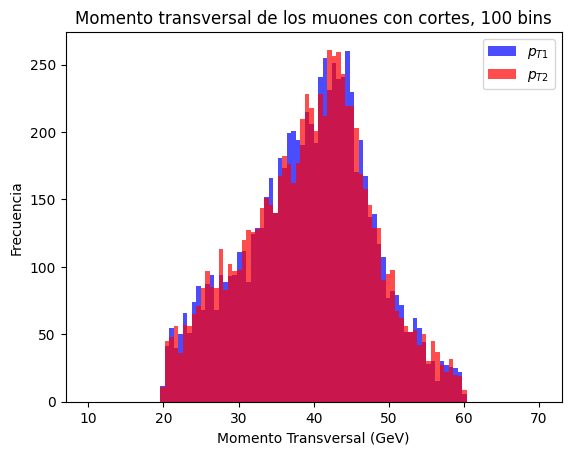

Estadísticas de pt1 y pt2:
               pt1          pt2
count  7828.000000  7828.000000
mean     39.385804    39.363547
std       8.363475     8.428370
min      20.016200    20.013200
25%      33.776500    33.485025
50%      40.128650    40.060250
75%      45.020800    45.051350
max      59.964800    59.987400


In [13]:
import matplotlib.pyplot as plt

# Definir umbrales para el corte en el momento transversal
pt_lower_threshold = 20
pt_upper_threshold = 60

# Aplicar los cortes
filtered_particles = particles[
    (particles['pt1'] > pt_lower_threshold) & (particles['pt1'] < pt_upper_threshold) &
    (particles['pt2'] > pt_lower_threshold) & (particles['pt2'] < pt_upper_threshold)
]

# Crear el histograma con matplotlib para pt1 y pt2
plt.hist(filtered_particles['pt1'], bins=100, range=(10, 70), alpha=0.7, color='blue', label='$p_{T1}$')
plt.hist(filtered_particles['pt2'], bins=100, range=(10, 70), alpha=0.7, color='red', label='$p_{T2}$')
plt.title('Momento transversal de los muones con cortes, 100 bins')
plt.xlabel('Momento Transversal (GeV)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Calcular estadísticas
statistics_pt1 = filtered_particles['pt1'].describe()
statistics_pt2 = filtered_particles['pt2'].describe()

# Mostrar estadísticas en una tabla
statistics_table = pd.DataFrame({
    'pt1': statistics_pt1,
    'pt2': statistics_pt2
})

print("Estadísticas de pt1 y pt2:")
print(statistics_table)

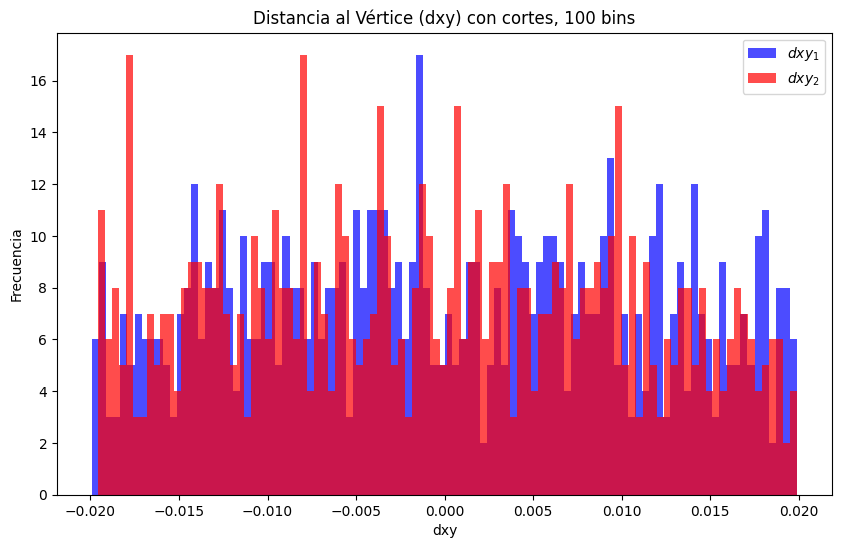

Estadísticas de dxy después de los cortes:
          mean       std     min     max
dxy1  0.000091  0.011043 -0.0199  0.0199
dxy2 -0.000646  0.010854 -0.0196  0.0199


In [14]:
# Aplicar cortes en dxy y aislamiento
cuts_dxy = (particles['dxy1'].abs() < 0.02) & (particles['dxy2'].abs() < 0.02)
filtered_particles_dxy = particles[cuts_dxy]

# Graficar histograma para dxy después de los cortes
plt.figure(figsize=(10, 6))
plt.hist(filtered_particles_dxy['dxy1'], bins=100, alpha=0.7, label='$dxy_1$', color='blue')
plt.hist(filtered_particles_dxy['dxy2'], bins=100, alpha=0.7, label='$dxy_2$', color='red')
plt.title('Distancia al Vértice (dxy) con cortes, 100 bins')
plt.xlabel('dxy')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Calcular estadísticas de dxy
stats_dxy = filtered_particles_dxy[['dxy1', 'dxy2']].describe().loc[['mean', 'std', 'min', 'max']].transpose()

# Mostrar tabla de estadísticas de dxy
print("Estadísticas de dxy después de los cortes:")
print(stats_dxy)

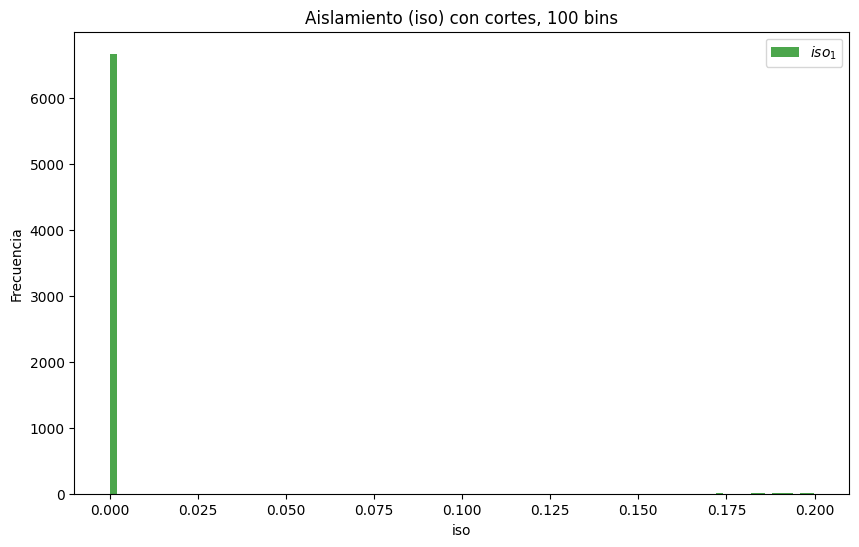

Estadísticas de iso después de los cortes:
        mean       std  min     max
iso1  0.0017  0.017661  0.0  0.1999


In [15]:
# Aplicar cortes en dxy y aislamiento
cuts_iso1 = (particles['iso1'] < 0.2)
filtered_particles_iso1 = particles[cuts_iso1]

# Graficar histograma para iso después de los cortes
plt.figure(figsize=(10, 6))
plt.hist(filtered_particles_iso1['iso1'], bins=100, alpha=0.7, label='$iso_1$', color='green')
plt.title('Aislamiento (iso) con cortes, 100 bins')
plt.xlabel('iso')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Calcular estadísticas de iso
stats_iso1 = filtered_particles_iso1[['iso1']].describe().loc[['mean', 'std', 'min', 'max']].transpose()

# Mostrar tabla de estadísticas de iso
print("Estadísticas de iso después de los cortes:")
print(stats_iso1)

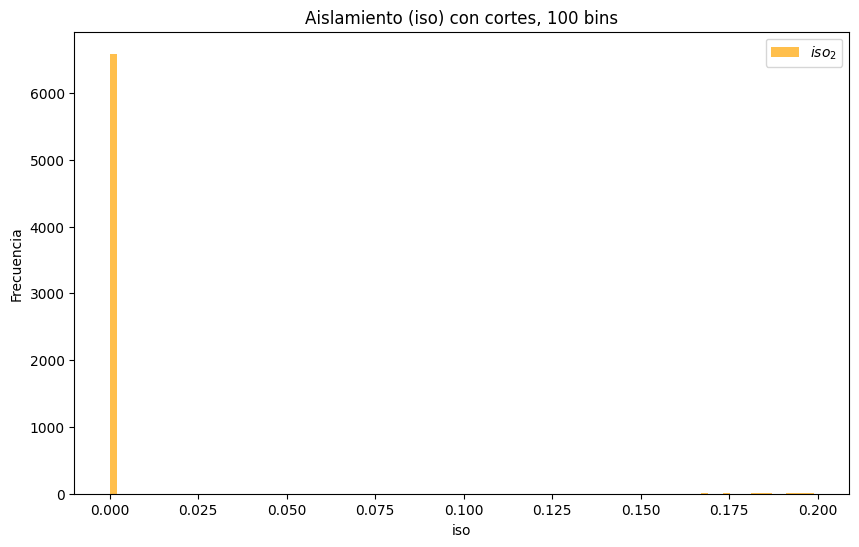

Estadísticas de iso después de los cortes:
          mean       std  min    max
iso2  0.001762  0.017912  0.0  0.199


In [16]:
# Aplicar cortes en dxy y aislamiento
cuts_iso2 = (particles['iso2'] < 0.2)
filtered_particles_iso2 = particles[cuts_iso2]

# Graficar histograma para iso después de los cortes
plt.figure(figsize=(10, 6))
plt.hist(filtered_particles_iso2['iso2'], bins=100, alpha=0.7, label='$iso_2$', color='orange')
plt.title('Aislamiento (iso) con cortes, 100 bins')
plt.xlabel('iso')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Calcular estadísticas de iso
stats_iso2 = filtered_particles_iso2[['iso2']].describe().loc[['mean', 'std', 'min', 'max']].transpose()

# Mostrar tabla de estadísticas de iso
print("Estadísticas de iso después de los cortes:")
print(stats_iso2)

<ipython-input-17-c045b358da70>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



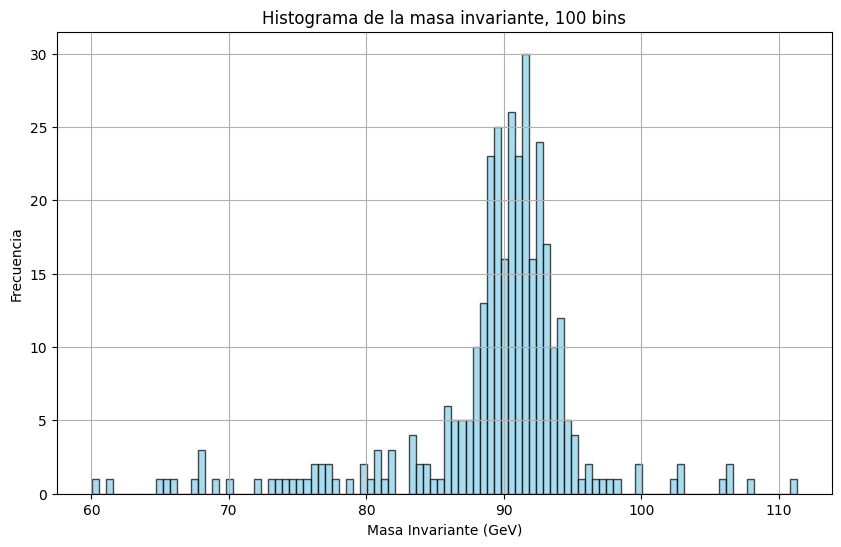

Estadísticas de la masa invariante:
count    338.000000
mean      89.349023
std        6.543608
min       60.052368
25%       88.564002
50%       90.500113
75%       92.408314
max      111.288721
Name: invariant_mass, dtype: float64


In [17]:
# Aplicar cortes conjuntos en pt (20 GeV <= pt <= 60 GeV), |dxy| < 0.02 y iso < 0.2
cuts = ((particles['pt1'].between(20, 60)) &
        (particles['pt2'].between(20, 60)) &
        (particles['dxy1'].abs() < 0.02) &
        (particles['dxy2'].abs() < 0.02) &
        (particles['iso1'] < 0.2) &
        (particles['iso2'] < 0.2))

filtered_particles = particles[cuts]

# Calcular la masa invariante
def invariant_mass(pt1, eta1, phi1, pt2, eta2, phi2):
    cosh_eta_diff = np.cosh(eta1 - eta2)
    cos_phi_diff = np.cos(phi1 - phi2)
    inv_mass = np.sqrt(2 * pt1 * pt2 * (cosh_eta_diff - cos_phi_diff))
    return inv_mass

filtered_particles['invariant_mass'] = invariant_mass(filtered_particles['pt1'],
                                                      filtered_particles['eta1'],
                                                      filtered_particles['phi1'],
                                                      filtered_particles['pt2'],
                                                      filtered_particles['eta2'],
                                                      filtered_particles['phi2'])

# Calcular estadísticas de la masa invariante
mass_stats = filtered_particles['invariant_mass'].describe()

# Mostrar histograma de masa invariante
plt.figure(figsize=(10, 6))
plt.hist(filtered_particles['invariant_mass'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de la masa invariante, 100 bins')
plt.xlabel('Masa Invariante (GeV)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Mostrar estadísticas de la masa invariante
print("Estadísticas de la masa invariante:")
print(mass_stats)

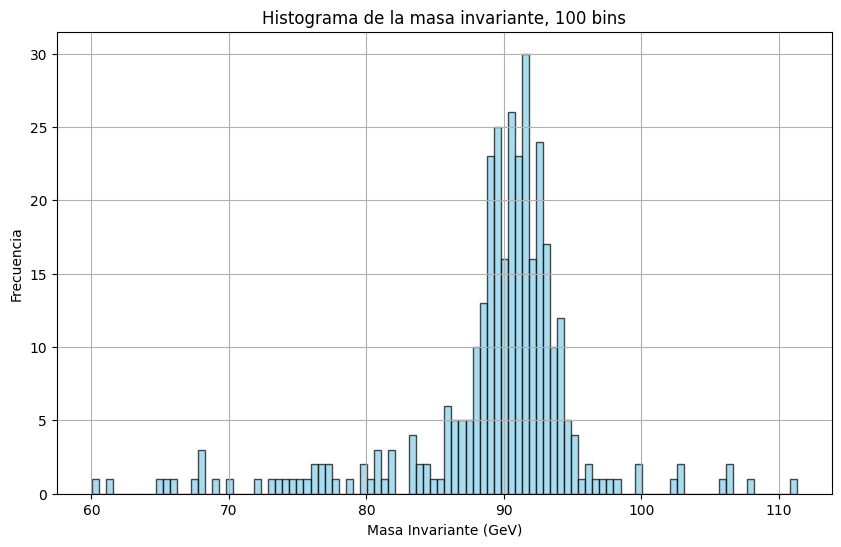

Estadísticas de la masa invariante:
count    338.000000
mean      89.349023
std        6.543608
min       60.052368
25%       88.564002
50%       90.500113
75%       92.408314
max      111.288721
Name: invariant_mass, dtype: float64


In [18]:
# Aplicar cortes conjuntos en pt (20 GeV <= pt <= 60 GeV), |dxy| < 0.02 y iso < 0.2
cuts = ((particles['pt1'].between(20, 60)) &
        (particles['pt2'].between(20, 60)) &
        (particles['dxy1'].abs() < 0.02) &
        (particles['dxy2'].abs() < 0.02) &
        (particles['iso1'] < 0.2) &
        (particles['iso2'] < 0.2))

filtered_particles = particles[cuts].copy()  # Crear una copia para evitar la advertencia

# Calcular la masa invariante
def invariant_mass(pt1, eta1, phi1, pt2, eta2, phi2):
    cosh_eta_diff = np.cosh(eta1 - eta2)
    cos_phi_diff = np.cos(phi1 - phi2)
    inv_mass = np.sqrt(2 * pt1 * pt2 * (cosh_eta_diff - cos_phi_diff))
    return inv_mass

filtered_particles['invariant_mass'] = invariant_mass(filtered_particles['pt1'],
                                                      filtered_particles['eta1'],
                                                      filtered_particles['phi1'],
                                                      filtered_particles['pt2'],
                                                      filtered_particles['eta2'],
                                                      filtered_particles['phi2'])

# Calcular estadísticas de la masa invariante
mass_stats = filtered_particles['invariant_mass'].describe()

# Mostrar histograma de masa invariante
plt.figure(figsize=(10, 6))
plt.hist(filtered_particles['invariant_mass'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de la masa invariante, 100 bins')
plt.xlabel('Masa Invariante (GeV)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Mostrar estadísticas de la masa invariante
print("Estadísticas de la masa invariante:")
print(mass_stats)